In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv(r'C:\Users\hughj\Downloads\iris.csv')


In [15]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [16]:
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [25]:
species = df["species"].tolist()
X = df.drop("species", 1)

In [27]:
#Standarize the data
X = (X - X.mean()) / X.std(ddof=0)

In [28]:
X

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [29]:
covariance=np.dot(X.T,X)/(X.shape[0]-1)
print(covariance)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [30]:
eigenvalues,eigenvector=np.linalg.eig(covariance)
print("eigenvalues \n",eigenvalues)
print("eigenvector \n",eigenvector)

eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [31]:
eigenvector=eigenvector.T
print("eigenvector after Transpose\n",eigenvector)
indexs=np.argsort(eigenvalues)[::-1]
#taking those indices and storing in eigenvalues and eigenvectors accordingly
eigenvector=eigenvector[indexs]
print("eigenvector after indexes \n",eigenvector)
eigenvalues=eigenvalues[indexs]
print("eigenvalues \n",eigenvalues) 

eigenvector after Transpose
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvector after indexes 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]


variance of each feature--> [72.96244541 22.85076179  3.66892189  0.51787091]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

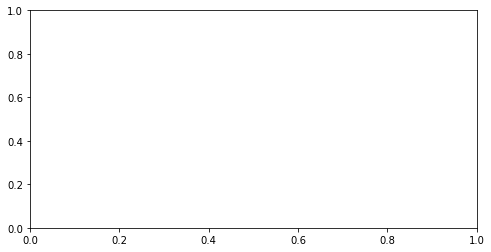

In [55]:
total = sum(eigenvalues)
variance_of_each_feature =(eigenvalues / np.sum(eigenvalues))*100
print("variance of each feature-->",variance_of_each_feature)
plt.figure(figsize=(8,4))
plt.bar(range(5),variance_of_each_feature, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
plt.title('Explained variance vs Dimensions')
plt.show()

In [45]:
features=eigenvector[:2]
print("features",features)

features [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]


In [40]:

np.dot(X,features.T)

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [41]:
pc1=X.dot(eigenvector.T[0])
pc2=X.dot(eigenvector.T[1])
res=pd.DataFrame(pc1,columns=["PC1"])
res["PC2"]=pc2
res['target']=species
res.head()

,PC1,PC2,target
0,-0.233230,-0.863303,1
1,0.074899,0.264668,1
2,-0.184237,-0.109029,1
3,-0.242289,0.163927,1
4,-0.383247,-1.043206,1


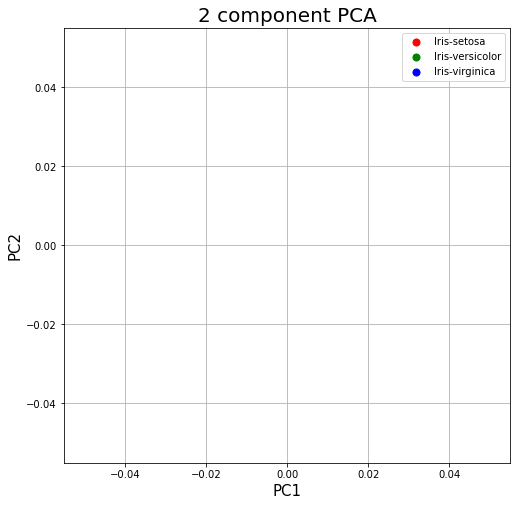

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = res['target'] == target
    ax.scatter(res.loc[indicesToKeep,'PC1']
               , res.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()